# PERS dataset - data cleaning and visualization

This kernel will look at the PERS dataset. PERS is the pension plan provided to public employees of the state of Oregon. This is an interesting dataset as PERS has been in the local news for paring down its payouts to new retirees due to not having enough money. This will help us see where the money is going to.

The dataset includes 129544 entries of people who have retired and had a PERS plan while working. The dataframe includes the following features:

* **id** is an integer value given to each row, starting at 1. The id is numbered when the dataset is sorted alphabeticaly by last name. 
* **name** is the full name of the retiree
* **lastname** is the last name of the retiree
* **firstname** is the first name of the retiree
* **init** is the middle initial of the retiree
* **gross** is the monthly benefit allotted to the retiree
* **retire** is the retire date of the retiree
* **plan** is the plan type the retiree had signed up for. 
  - **Tier One** were hired before 1996, are guaranteed a rate of return on their account balances equal to the assumed earnings rate, which has varied from 5 percent to 8 percent annually. Before 2003, when investment returns were higher, PERS often passed them through to members. Before 2003, members' 6 percent contributions went into the pension fund and earned investment returns. That inflated balances and benefits for those retiring under the money match formula. In some cases, benefits exceed final  salary. Reforms in 2003 diverted member contributions into individual accounts, out of the money match calculation and the return guarantee. They also capped investment earning crediting on accounts at the assumed earnings rate — 8 percent today. Normal retirement age is 58.
  - **Tier Two** were hired from Jan. 1, 1996 to Aug. 28, 2003, have no return guarantee on accounts, and get market returns. Normal retirement age is 60, or after 30 years service.
  - **OPSRP** (Oregon Public Service Retirement Program) employees, hired on or after Aug. 29, 2003, do not have the option to retire under money match. Their benefit formula also is less generous. Normal retirement age is 65.
* **service** is the number of months the retiree worked for under the PERS program
* **salary** is the monthly average of the high three calendar years' salary over a member's career as reported by employers. Data was aggregated into years based on paid date. The three highest totals were added together and divided by 36 to create a monthly salary amount. No determination was made whether the amount for a year represents a full or partial year. Amounts were used for a full year even in cases of a partial year. If a benefit recipient did not have three separate years in which salary was earned, the total salary was divided by either 24 or 12 depending if the salary was earned all within one or two separate years. Salary does not include the 6 percent member contribution if paid by an employer.
* **calc** is the calculation method for the payout PERS uses up to four methods (depending on eligibility) to calculate Tier One and Tier Two retirement benefits: Full Formula, Money Match, Formula Plan Annuity, and 50 percent of Final Salary (only available for Police & Fire Duty Disability). Judge retirements are shown as Full Formula. The OPSRP Pension Program uses a formula method only. Benefits get calculated in one of three ways. The dominant method is shifting from money match to full formula. Money match provides far more generous benefits for older employees. Full Formula is supposed to replace 50 percent of final salary after 30 years of service.
  - **Money Match:** Employee's account balance at retirement is matched by employer(s), and the balance is annuitized over the member's life expectancy. Members also receive annual cost of living adjustment, or COLA, up to 2 percent.

  - **Full Formula:** Member's monthly final salary is multiplied by years of creditable service; that sum is multipied 1.67 percent for general employees; 2.0 percent for police and fire. (For hires after Aug. 29, 2003, it's 1.5 percent for general employees; 1.8 percent for police and fire.) Annual COLA up to 2 percent.

  - **Formula Plus Annuity:** Only available to members who made contributions before Aug. 21, 1981, it annuitizes a member's account balance; then adds one percent of the final salary (1.35 percent for legislators, police and firefighters) multiplied by years of creditable service. COLA up to 2 percent.
  - **50 percent of Final Salary** Only available for Police & Fire Duty Disability

In [41]:
## import data analysis libraries and data vis libraries

import numpy as np
import pandas as pd
import math
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# import the data
df = pd.read_csv('/Users/thejason/Documents/datasets/PERS Public Record Results Jan 1 2018.csv')

## Data Cleaning

We will focus here on cleaning the dataset. 

In [3]:
# We will take a glance at what our dataset looks like by looking at the first 5 rows
df.head()

,id,name,lastname,firstname,init,gross,retire,plan,service,salary,calc
0,1,"AAB, LARRY A",AAB,LARRY,A,5886.30,2011-01-01,Tier One,331.0,10181.33,Formula Plus Annuity
1,2,"AABERG, DONALD R",AABERG,DONALD,R,5182.13,2001-03-01,Tier One,181.0,866.72,NaN
2,3,"AABY, MARY E",AABY,MARY,E,1000.74,2011-05-01,Tier One,183.0,3464.18,Full Formula
3,4,"AAGAARD, JOANNE D",AAGAARD,JOANNE,D,2406.03,1997-01-01,Tier One,230.0,3513.47,Money Match
4,5,"AALBERG, JEFFREY L",AALBERG,JEFFREY,L,3361.50,2013-01-01,Tier One,300.0,5867.91,NaN


In [4]:
# also doing describe() is a handy way to get an overview of the entire dataset
df.describe(include='all')

,id,name,lastname,firstname,init,gross,retire,plan,service,salary,calc
count,129544.000000,129544,129540,129537,120025,129544.000000,129544,129544,129542.000000,123373.00000,116609
unique,NaN,127481,37049,8182,26,NaN,536,10,NaN,NaN,4
top,NaN,"JONES, ROBERT E",SMITH,ROBERT,L,NaN,1998-03-01,Tier One,NaN,NaN,Money Match
freq,NaN,7,1176,2604,17378,NaN,3249,109044,NaN,NaN,63731
mean,64772.500000,NaN,NaN,NaN,NaN,2690.518737,NaN,NaN,247.741759,4119.84693,NaN
std,37396.275973,NaN,NaN,NaN,NaN,2143.828329,NaN,NaN,105.656891,2363.34559,NaN
min,1.000000,NaN,NaN,NaN,NaN,1.130000,NaN,NaN,1.000000,0.75000,NaN
25%,32386.750000,NaN,NaN,NaN,NaN,1013.902500,NaN,NaN,165.000000,2582.14000,NaN
50%,64772.500000,NaN,NaN,NaN,NaN,2181.425000,NaN,NaN,256.000000,3882.69000,NaN
75%,97158.250000,NaN,NaN,NaN,NaN,3923.182500,NaN,NaN,339.000000,5227.34000,NaN


The dataset has 4 features pertaining to name. This is redundant and we aren't interested in the identity of these people. We will drop these features. Instaed, we will just use id to differentiate between people. This has the benefit of not having to do any cleaning on the missing entries. While 'name' isn't missing any entries, 'lastname','firstname', and 'init' are missing up to 900 entries. 

In [5]:
# remove the 4 features related to the person's identity
df = df.drop(['name','lastname','firstname','init'],axis=1)

In [6]:
# next we'll convert the monthly columns (gross, service, and salary) to yearly values and drop the monthly columns
df['yr_benefit'] = df.gross*12
df['yr_service'] = df.service/12
df['yr_salary'] = df.salary*12

df = df.drop(['gross','service','salary'],axis=1)

df.describe(include='all')

,id,retire,plan,calc,yr_benefit,yr_service,yr_salary
count,129544.000000,129544,129544,116609,129544.000000,129542.000000,1.233730e+05
unique,NaN,536,10,4,NaN,NaN,NaN
top,NaN,1998-03-01,Tier One,Money Match,NaN,NaN,NaN
freq,NaN,3249,109044,63731,NaN,NaN,NaN
mean,64772.500000,NaN,NaN,NaN,32286.224849,20.645147,4.943816e+04
std,37396.275973,NaN,NaN,NaN,25725.939954,8.804741,2.836015e+04
min,1.000000,NaN,NaN,NaN,13.560000,0.083333,9.000000e+00
25%,32386.750000,NaN,NaN,NaN,12166.830000,13.750000,3.098568e+04
50%,64772.500000,NaN,NaN,NaN,26177.100000,21.333333,4.659228e+04
75%,97158.250000,NaN,NaN,NaN,47078.190000,28.250000,6.272808e+04


Now the dataset is a little more intuitive. let's tackle the data cleaning. There are three columns with missing data: calc, yr_service, and yr_salary. 

In [7]:
# yr_service is missing 2 entries. We will fill these in with the mean value of the column. 

df['yr_service'] = df['yr_service'].fillna(df['yr_service'].mean())

In [8]:
# yr_salary is missing about 6k entries. For this imputation, we'll first calculate the ratio between 
# yr_benefit and yr_salary. The mean average ratio will be multiplied against the yr_benefit to fill 
# the missing yr_salary values. 

# calculate the yr_benefit/yr_salary ratio
df = df.assign(ben_sal_ratio = df['yr_benefit']/df['yr_salary'])
# calculate the imputations for yr_salary
ratio_mean = np.mean(df.ben_sal_ratio)
df['yr_salary'] = df['yr_salary'].fillna(df['yr_benefit']*ratio_mean)
df['ben_sal_ratio'] = df['ben_sal_ratio'].fillna(ratio_mean)

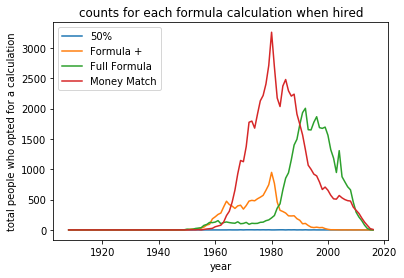

In [9]:
# Calc is missing over 10k entries. We will explore patterns in this variable to better understand it 
# and how to fill these empty cells.

# calculate the date of hire for each retiree
df['retire'] = pd.to_datetime(df['retire'])
df['yr_service'] = pd.to_timedelta(df['yr_service'],unit='Y')
df['hire_date'] = df['retire']-df['yr_service']
# create a separate value that holds only the year data
df['year_hire'] = df["hire_date"].dt.year

# plot changes of time of what calculation people opt for when they get hired
plt.plot(df.groupby(['year_hire','calc'])['hire_date'].count().unstack().fillna(0))
plt.legend(['50%','Formula +','Full Formula','Money Match'])
plt.title('counts for each formula calculation when hired')
plt.ylabel('total people who opted for a calculation')
plt.xlabel('year')
plt.show()

We see that Money Match was the most common until around 1990, when it was overtaken by Full Formula. Money Match is a calculation that offers retirees a much higher return. It seems PERS pushed Full Formula as a more sustainable option starting 1980. Money Match gradually shrank as an option. 

For our imputation of the 'calc' column, we will fill the missing entries with the mode 'calc' for the given year. 

In [10]:
# create a dataframe of the count for each calculation type per year. This will be our reference table for imputation
df3 = df.groupby(['year_hire','calc'])['hire_date'].count().unstack().fillna(0)
df3.head()

calc,50% FAS P & F,Formula Plus Annuity,Full Formula,Money Match
year_hire,,,,
1908,0.0,0.0,1.0,0.0
1946,0.0,0.0,1.0,0.0
1947,0.0,1.0,2.0,0.0
1948,0.0,1.0,2.0,0.0
1949,0.0,2.0,2.0,0.0


In [11]:
# for every row with a NaN in 'calc' fill with the mode 'calc' for that year
for idx, row in df.iterrows():
    if pd.isnull(row['calc']):
        if row['year_hire'] in df3.index:
            df.loc[idx,'calc'] = df3.xs(row['year_hire']).idxmax()
        else:
            df.loc[idx,'calc'] = 'Full Formula'


## Data Visualization
Our data cleaning is done, now let's get plotting to explore our data!

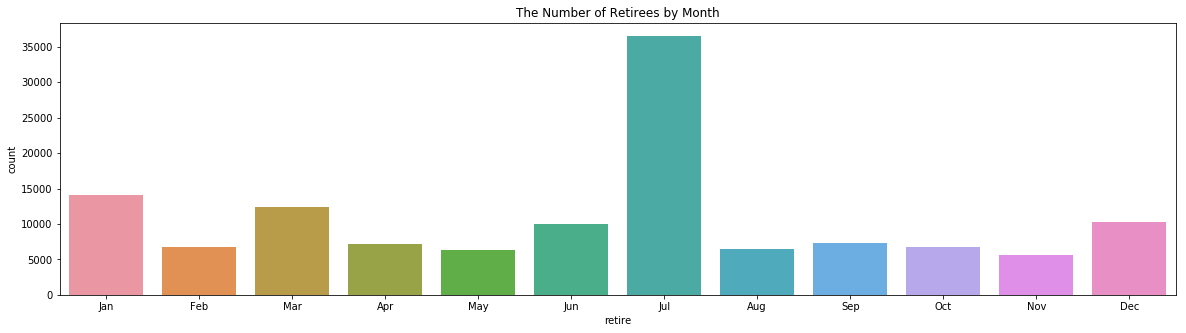

In [12]:
plt.figure(figsize=(20,5))
ax = sns.countplot(df["retire"].dt.month)
xlabel = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(xlabel)
plt.title('The Number of Retirees by Month')
plt.show()

Here, we plot a histogram of the months that people retire. There is a significant peak in July. This makes sense as the majority of PERS eligible employees are teachers. Teachers generally retire after the end of the school year, which is typically in June. 

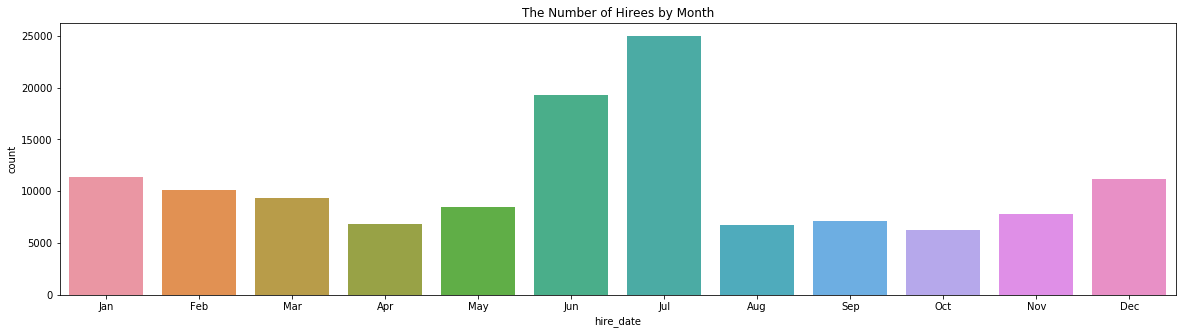

In [13]:
plt.figure(figsize=(20,5))
ax = sns.countplot(df["hire_date"].dt.month)
xlabel = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(xlabel)
plt.title('The Number of Hirees by Month')
plt.show()

When we look at the histogram of hiring months, June and July stick out. Again, with the bulk of the dataset professions being teachers, they probably give notice of their retirement so hiring can start as early as June to replace them. 

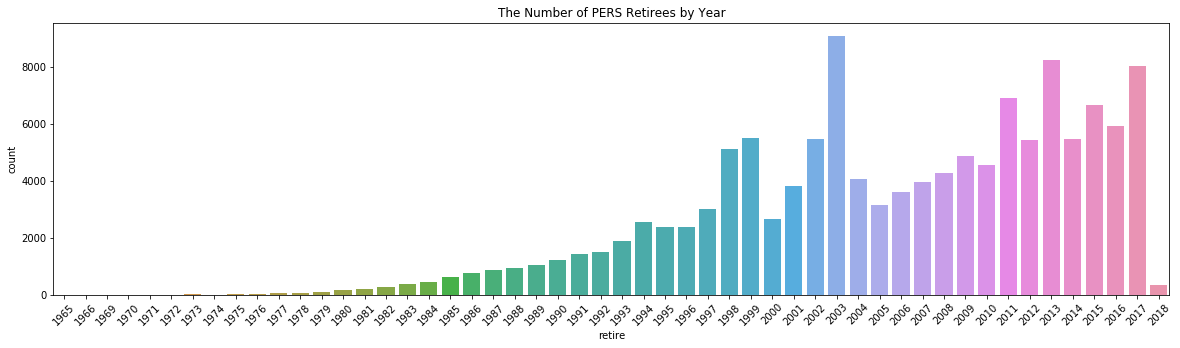

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(df["retire"].dt.year)
plt.xticks(rotation=45)
plt.title('The Number of PERS Retirees by Year')
plt.show()

Here we see a very slow ramp up on the number of retirees in the first half. This makes sense as there were fewer people on the PERS plan when it started. Perhaps only new employees were eligible on the PERS plan when it was first introduced, thus unlikely that they were near retirement. Once we get into the 1980's, we see some noticeable numbers in the number of retirees and seems to increase in a linear or binomial curve until the mid 1990's.

We also see a few anomalies in 1998, 1999, 2003 and a few other peaks in the 2010's. It would be interesting to relate these events to any changes in the PERS program that would encourage people to retire in a particular year. We do know that 2003 had some major changes, particularly in the Tier One, as described in the feature explanation above. 

In [19]:
# we will create a dataset of only people who retired in 2003
df_2003 = df[df['retire'].dt.year==2003]
df_2003.describe()

,id,yr_benefit,yr_service,yr_salary,ben_sal_ratio,year_hire
count,9092.000000,9092.000000,9092,9092.000000,9092.000000,9092.000000
mean,64525.707325,38858.648500,7596 days 18:41:34.001759,45175.080574,0.884464,1982.132754
std,37694.200692,26849.898232,3008 days 13:45:17.984418,20627.997062,0.967095,8.248137
min,27.000000,1410.840000,0 days 00:00:00,337.560000,0.034800,1954.000000
25%,31877.000000,16634.610000,5113 days 09:28:48,30054.390000,0.500468,1975.000000
50%,64264.000000,33998.220000,8035 days 08:02:24,45375.480000,0.817325,1981.000000
75%,97089.000000,56667.990000,10226 days 18:57:36,57518.640000,1.141196,1989.000000
max,129544.000000,219420.000000,17896 days 21:10:48,211176.720000,42.217206,2003.000000


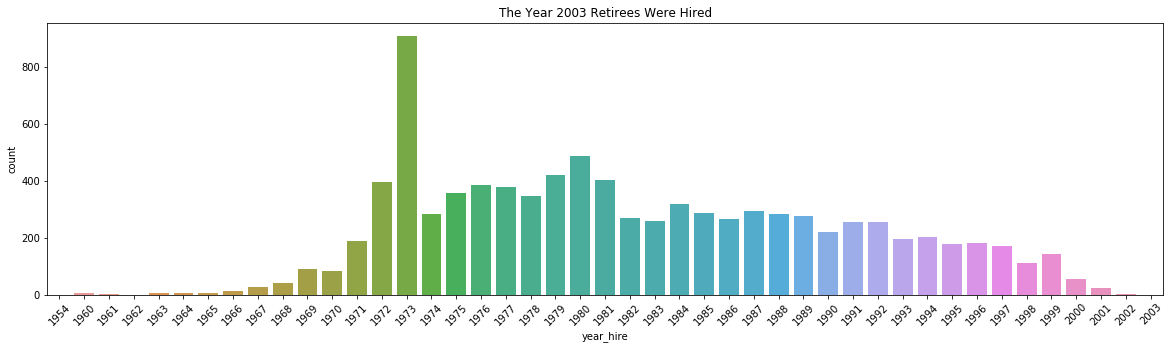

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(df_2003["year_hire"])
plt.xticks(rotation=45)
plt.title('The Year 2003 Retirees Were Hired')
plt.show()

There are over 9000 people who retired in 2003. Of these, about 10% of them started working exactly 30 years ago in 1973. PERS has two stipulations to fully vest, either 30 years of employment or a specified age. It seems the 30 year employment group found it very worth while to retire!

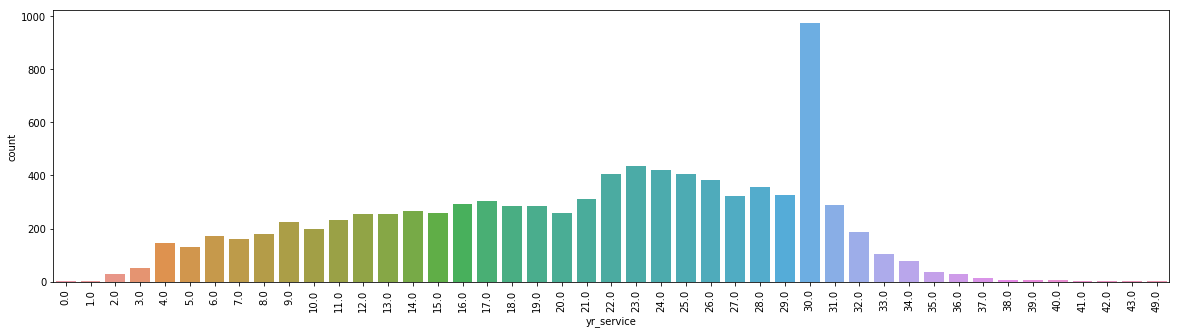

In [48]:
plt.figure(figsize=(20,5))
sns.countplot(np.floor(df_2003['yr_service'].dt.days/365.0))
plt.xticks(rotation=90)
plt.show()

The above chart confirms that most of the retirees chose to retire in 2003 because they had worked 30 years. 

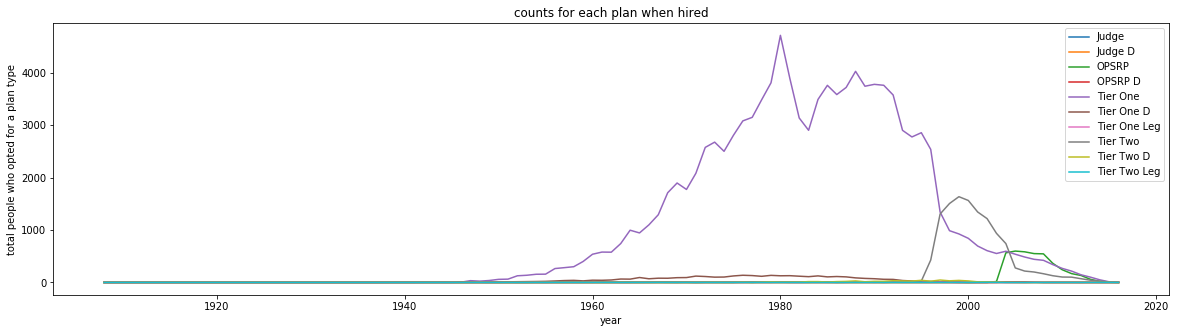

In [54]:
# plot changes of time of what calculation people opt for when they get hired
plt.figure(figsize=(20,5))
plt.plot(df.groupby(['year_hire','plan'])['hire_date'].count().unstack().fillna(0))
plt.legend(['Judge','Judge D','OPSRP','OPSRP D','Tier One','Tier One D','Tier One Leg','Tier Two','Tier Two D','Tier Two Leg'])
plt.title('counts for each plan when hired')
plt.ylabel('total people who opted for a plan type')
plt.xlabel('year')
plt.show()

In [51]:
df.groupby(['year_hire','plan'])['hire_date'].count().unstack().fillna(0)

plan,Judge,Judge Disability,Oregon Public Service Retirement Plan (OPSRP) Pension,Oregon Public Service Retirement Plan (OPSRP) Pension Disability,Tier One,Tier One Disability,Tier One/Legislators,Tier Two,Tier Two Disability,Tier Two/Legislators
year_hire,,,,,,,,,,
1908,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1932,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1935,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1936,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1937,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1939,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1940,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1941,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1942,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
